In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.color_palette("Set2")


sns.set_style("whitegrid", {'axes.grid' : False})
plt.rc("axes", titlesize=20)
plt.rc("axes", labelsize=20)



In [4]:
df = pd.read_csv("sdss_point_sources.dat", 
                 sep="\s+")
df.head()

,u_g,g_r,r_i,i_z,classe
0,-0.079,0.136,0.233,0.046,1
1,0.033,0.255,0.454,0.300,1
2,0.110,0.425,0.221,-0.158,1
3,0.325,0.448,0.114,0.221,1
4,0.220,0.049,0.189,0.040,1


In [5]:
feature_names = ['u_g', 'g_r', 'r_i', 'i_z']
target_names = ["1","2","3"]
X = df[feature_names]
y = df['classe']

<Figure size 864x864 with 0 Axes>

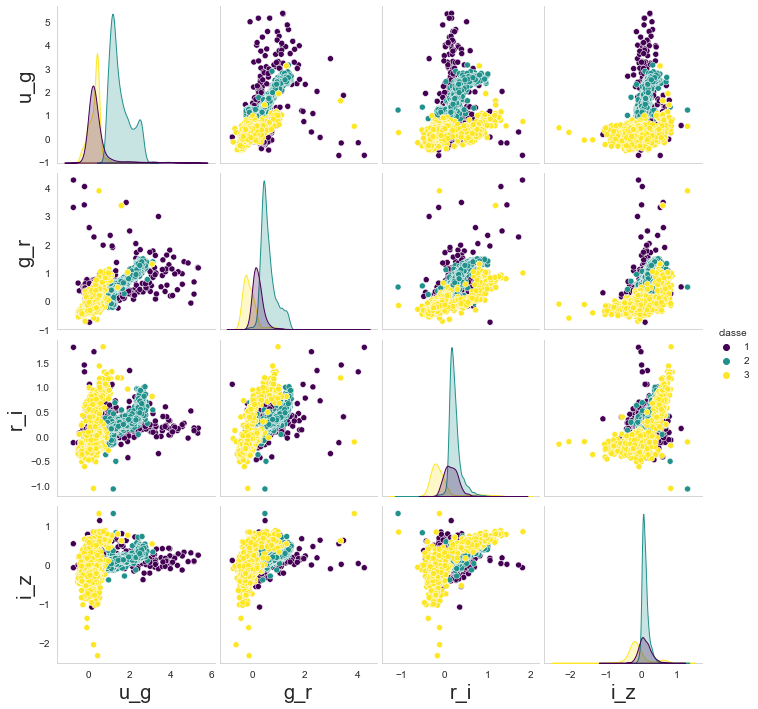

In [8]:
#Seaborn pair plot
plt.figure(figsize=(12,12))
sns.pairplot(df, hue='classe',palette="viridis")



# Using Decision Tree
### Using just one random_state

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn import tree


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 6,
                            random_state = 0).fit(X_train, y_train)



In [28]:
score_test_max = 0
score_train_max = 0
md_max = 0 
for rs in range(0,20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs)
    for md in range(1,10):
        clf = DecisionTreeClassifier(max_depth = md, min_samples_leaf = 6,random_state = 0).fit(X_train, y_train)
        score_test = clf.score(X_test, y_test)
        score_train = clf.score(X_train, y_train)
        if score_test > score_test_max:
            score_test_max = score_test
            score_train_max = score_train
            rs_max = rs
            md_max = md
            
print('Best Random State :', rs_max)
print('Best Max Depth :', md_max)
print('Accuracy of TD classifier on training set: {:.2f}'
     .format(score_train_max))
print('Accuracy of TD classifier on test set: {:.2f}'
     .format(score_test_max))

Best Random State : 10
Best Max Depth : 8
Accuracy of TD classifier on training set: 0.98
Accuracy of TD classifier on test set: 0.98


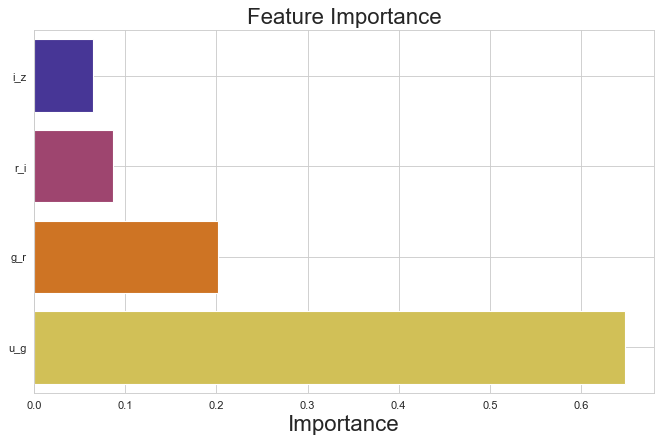

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs_max)
clf = DecisionTreeClassifier(max_depth = md_max, min_samples_leaf = 6,random_state = 0).fit(X_train, y_train)




importances = clf.feature_importances_

plt.figure(figsize=(10,6),dpi=80)
serie = (pd.DataFrame(clf.feature_importances_, index=X.columns).sort_values(0))   #.plot(kind='barh',color=[ 'darkblue', 'blue', 'cornflowerblue', 'lightsteelblue'],edgecolor= 'black'))

sns.barplot(x=0,y=serie.index,data=serie,palette="CMRmap")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.grid()


In [11]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ModuleNotFoundError: No module named 'graphviz'

In [13]:
from sklearn.metrics import confusion_matrix


tree_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)

Decision tree classifier (max_depth = 2)
 [[ 484   13    8]
 [  22 1208    1]
 [  29    0  485]]


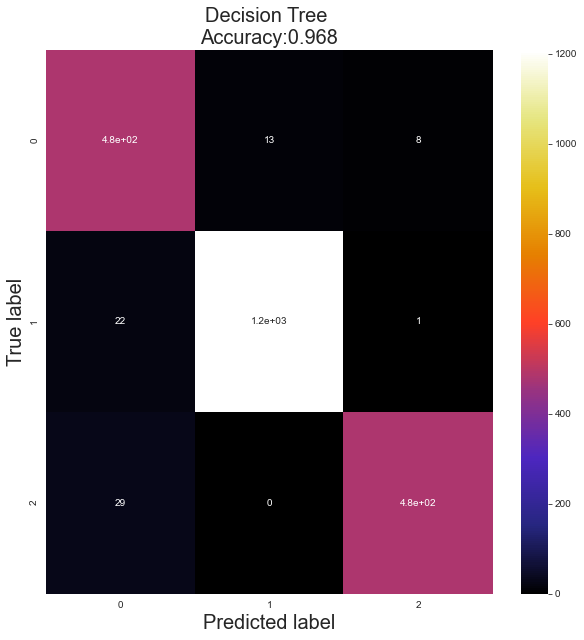

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df_cm = pd.DataFrame(confusion, 
                     index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

plt.figure(figsize=(10,10))
sns.heatmap(df_cm, annot=True, cmap="CMRmap")
plt.title('Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                       tree_predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names=['1', '2','3']))

              precision    recall  f1-score   support

           1       0.90      0.96      0.93       505
           2       0.99      0.98      0.99      1231
           3       0.98      0.94      0.96       514

    accuracy                           0.97      2250
   macro avg       0.96      0.96      0.96      2250
weighted avg       0.97      0.97      0.97      2250



In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_clf)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

# Using Kernelized SVM

In [30]:
from sklearn.svm import SVC


score_test_max = 0
# preguiça de usar array usei lista mesmo
score_test_max_array = []
score_train_max_array = []
c_array = []
g_array = []
for rs in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs)
    for c in (np.arange(0.1,100)):
        for g in (np.arange(0.0001, 10)):
            clf = SVC(kernel = 'rbf', gamma = g,C = c).fit(X_train, y_train)    
            score_test = clf.score(X_test, y_test)
            score_train = clf.score(X_train, y_train)
            if score_test > score_test_max:
                score_test_max = score_test
                score_train_max = score_train
                g_max = g
                c_max = c
                random_state_max = rs
            

gamma: 9.0001
C: 81.1
Accuracy of Linear SVC classifier on training set: 0.99
Accuracy of Linear SVC classifier on test set: 0.99


In [36]:
print("Best Random State: ", random_state_max)
print("Best Gamma Value: ", g_max)
print("C:",c_max)
print('Accuracy of Linear SVC classifier on training set: {:.3f}'
     .format(score_train_max))
print('Accuracy of Linear SVC classifier on test set: {:.3f}'
     .format(score_test_max))

Best Random State:  4
Best Gamma Value:  9.0001
C: 81.1
Accuracy of Linear SVC classifier on training set: 0.994
Accuracy of Linear SVC classifier on test set: 0.988


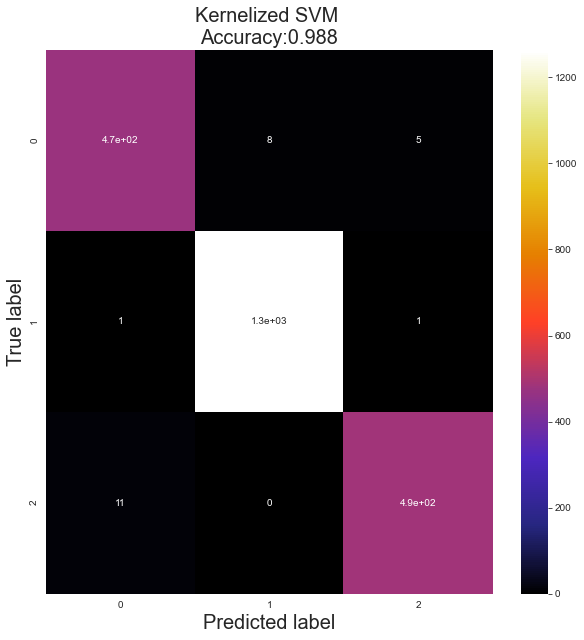

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state_max)
clf = SVC(kernel = 'rbf', gamma = g_max,C = c_max).fit(X_train, y_train)    

y_pred = clf.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df_cm = pd.DataFrame(confusion, 
                     index = [i for i in range(0,3)], columns = [i for i in range(0,3)])

plt.figure(figsize=(10,10))
sns.heatmap(df_cm, annot=True, cmap="CMRmap")
plt.title('Kernelized SVM \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                       tree_predicted)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [50]:
print(classification_report(y_test, tree_predicted, target_names=['1', '2','3']))

              precision    recall  f1-score   support

           1       0.98      0.97      0.97       487
           2       0.99      1.00      1.00      1265
           3       0.99      0.98      0.98       498

    accuracy                           0.99      2250
   macro avg       0.99      0.98      0.98      2250
weighted avg       0.99      0.99      0.99      2250



In [52]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent', random_state = 1)
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.5622222222222222

# Spliting in 2 classifications. Star x Quasar

In [22]:
from sklearn.model_selection import train_test_split


df_star = df.loc[(df["classe"] == 2)|(df["classe"] == 3)].drop("classe", axis=1)
df_star["classe"] = 2
df_quasar = df.loc[df["classe"] == 1]
df_merge = pd.concat([df_star,df_quasar]).reset_index().drop("index", axis=1)
df_merge.head()

,u_g,g_r,r_i,i_z,classe
0,2.565130,1.140717,0.454219,0.282032,2
1,1.219900,0.465681,0.175379,0.060576,2
2,1.268289,0.397114,0.194193,0.031632,2
3,1.963503,0.817444,0.281929,0.179737,2
4,1.235975,0.518007,0.212653,0.058380,2


In [23]:
feature_names = ['u_g', 'g_r', 'r_i', 'i_z']
target_names = ["Quasar","Star"]
X = df_merge[feature_names]
y = df_merge['classe']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)



## 

<Figure size 864x864 with 0 Axes>

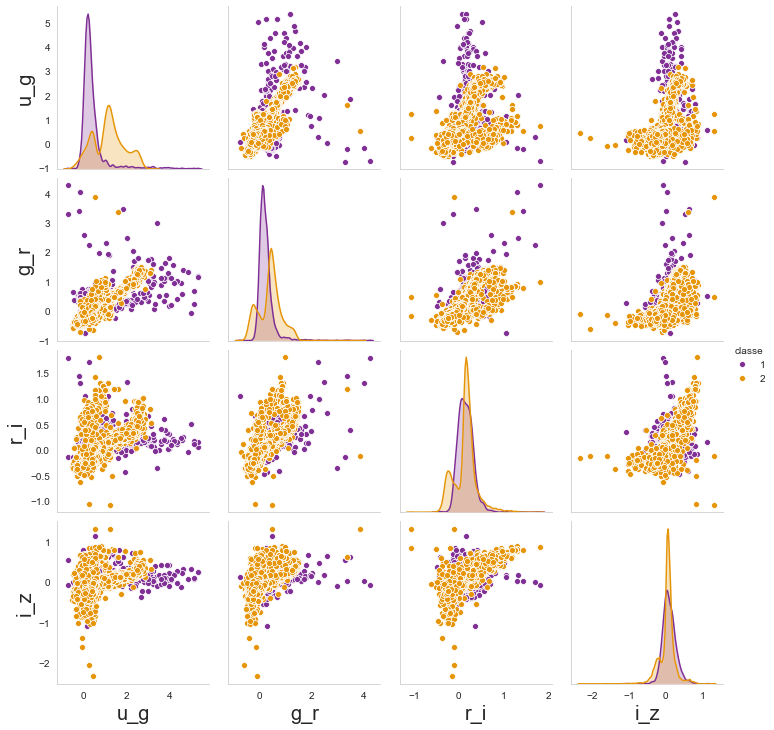

In [184]:
#Seaborn pair plot
plt.figure(figsize=(12,12))
sns.pairplot(df_merge, hue='classe',palette="CMRmap")


## Support Vector Machines

### Kernelized SVM

In [34]:
from sklearn.svm import SVC


score_test_max = 0
# preguiça de usar array usei lista mesmo
score_test_max_array = []
score_train_max_array = []
c_array = []
g_array = []
for rs in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = rs)
    for c in (np.arange(0.1,100)):
        for g in (np.arange(0.0001, 10)):
            clf = SVC(kernel = 'rbf', gamma = g,C = c).fit(X_train, y_train)    
            score_test = clf.score(X_test, y_test)
            score_train = clf.score(X_train, y_train)
            if score_test > score_test_max:
                score_test_max = score_test
                score_train_max = score_train
                g_max = g
                c_max = c
                random_state_max = rs
            
print("gamma:",g_max)
print("C:",c_max)
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(score_train_max))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(score_test_max))

gamma: 4.0001
C: 3.1
Accuracy of Linear SVC classifier on training set: 0.99
Accuracy of Linear SVC classifier on test set: 0.99


In [36]:
print("Random State:",rs)
print("Gamma:",g_max)
print("C:",c_max)
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(score_train_max))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(score_test_max))

Random State: 9
Gamma: 4.0001
C: 3.1
Accuracy of Linear SVC classifier on training set: 0.99
Accuracy of Linear SVC classifier on test set: 0.99
